# Coverage Guided Fuzzer
### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches and on the fuzzer we wrote
+ We discuss and compare each fuzzing approach in terms of coverage.
+ We plot how the coverage increases for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Subnet Calculator

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

In [1]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [33]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [34]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 2nd, 3rd and 4th octet as 0 and we are going to randomize only the 1st octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [78]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

def pure_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [79]:
pure_random_ip_fuzz()

'55.44.179.252'

In [80]:
valid_inputs = set()
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.add(input_ip) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 201.237.21.7
input Subet Mask is 235.76.146.252
input IP Address is 102.231.220.116
input Subet Mask is 203.15.97.11
input IP Address is 106.128.105.203
input Subet Mask is 142.80.15.32
input IP Address is 145.163.132.141
input Subet Mask is 148.83.116.164
input IP Address is 55.166.161.102
input Subet Mask is 244.67.82.189
input IP Address is 78.75.0.193
input Subet Mask is 185.210.51.101
input IP Address is 249.65.235.121
input Subet Mask is 241.221.236.82
input IP Address is 117.179.221.124
input Subet Mask is 172.41.117.48
input IP Address is 0.170.157.151
input Subet Mask is 1.251.19.28
input IP Address is 200.206.144.35
input Subet Mask is 184.12.175.62
input IP Address is 86.21.25.48
input Subet Mask is 207.110.118.223
input IP Address is 60.77.167.215
input Subet Mask is 88.121.100.46
input IP Address is 189.245.145.137
input Subet Mask is 117.203.94.216
input IP Address is 87.38.106.62
input Subet Mask is 127.165.122.188
input IP Address is 82.161.23.3
inpu

input IP Address is 252.236.30.21
input Subet Mask is 121.125.172.10
input IP Address is 20.248.33.211
input Subet Mask is 8.28.62.123
input IP Address is 106.100.52.217
input Subet Mask is 20.184.142.249
input IP Address is 187.32.162.199
input Subet Mask is 12.68.205.196
input IP Address is 180.96.33.43
input Subet Mask is 136.72.41.152
input IP Address is 115.224.198.206
input Subet Mask is 255.77.187.31
input IP Address is 71.60.219.198
input Subet Mask is 148.116.65.172
input IP Address is 34.69.228.103
input Subet Mask is 58.229.152.33
input IP Address is 36.153.215.86
input Subet Mask is 85.201.54.4
input IP Address is 6.33.128.145
input Subet Mask is 67.198.176.31
input IP Address is 153.139.234.12
input Subet Mask is 230.255.135.87
input IP Address is 175.7.101.87
input Subet Mask is 199.85.34.167
input IP Address is 164.201.76.241
input Subet Mask is 5.154.231.196
input IP Address is 14.27.31.43
input Subet Mask is 10.151.110.22
input IP Address is 175.37.234.166
input Subet 

input Subet Mask is 174.47.127.81
input IP Address is 79.111.81.205
input Subet Mask is 130.247.83.212
input IP Address is 135.223.200.69
input Subet Mask is 152.49.207.254
input IP Address is 90.120.166.114
input Subet Mask is 206.64.53.103
input IP Address is 192.214.54.205
input Subet Mask is 10.11.182.110
input IP Address is 228.43.170.116
input Subet Mask is 204.170.150.79
input IP Address is 167.173.129.49
input Subet Mask is 251.91.141.168
input IP Address is 168.130.76.119
input Subet Mask is 234.213.112.81
input IP Address is 44.18.19.196
input Subet Mask is 119.120.119.233
input IP Address is 128.131.78.255
input Subet Mask is 242.210.243.215
input IP Address is 24.96.97.99
input Subet Mask is 99.226.27.98
input IP Address is 192.141.151.216
input Subet Mask is 66.93.202.163
input IP Address is 138.116.79.187
input Subet Mask is 72.120.208.43
input IP Address is 236.84.204.14
input Subet Mask is 195.98.128.254
input IP Address is 143.56.70.27
input Subet Mask is 143.117.30.22

input IP Address is 136.190.226.108
input Subet Mask is 229.17.191.100
input IP Address is 37.239.153.59
input Subet Mask is 86.34.119.187
input IP Address is 18.170.228.229
input Subet Mask is 235.249.80.30
input IP Address is 92.239.173.107
input Subet Mask is 200.93.209.39
input IP Address is 13.149.50.112
input Subet Mask is 205.228.154.159
input IP Address is 121.199.57.99
input Subet Mask is 110.20.150.197
input IP Address is 149.147.121.220
input Subet Mask is 51.56.139.150
input IP Address is 199.230.113.10
input Subet Mask is 81.46.98.241
input IP Address is 92.131.18.36
input Subet Mask is 184.151.25.87
input IP Address is 179.250.176.206
input Subet Mask is 184.108.230.6
input IP Address is 209.139.250.223
input Subet Mask is 149.165.4.115
input IP Address is 120.125.208.126
input Subet Mask is 108.232.86.210
input IP Address is 63.198.80.137
input Subet Mask is 184.79.163.83
input IP Address is 56.63.191.167
input Subet Mask is 183.9.38.54
input IP Address is 216.147.101.24

0.0

In [91]:
from fuzzingbook.Coverage import Coverage

input_ip = pure_random_ip_fuzz()
input_subnet= pure_random_ip_fuzz()

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('is_valid_ip_subnet', 2),
 ('subnet_calc', 26),
 ('is_valid_ip_subnet', 3),
 ('subnet_calc', 21),
 ('__exit__', 237),
 ('subnet_calc', 9),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 11),
 ('subnet_calc', 30),
 ('is_valid_ip_subnet', 6),
 ('subnet_calc', 18),
 ('subnet_calc', 24),
 ('subnet_calc', 6),
 ('subnet_calc', 12)]

In [84]:
def calculate_cumulative_coverage(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [87]:
trials = 20

population = []
for i in range(0, trials):
    population.append({"ip":pure_random_ip_fuzz(),"subnet":pure_random_ip_fuzz()})

cumulative_coverage = calculate_cumulative_coverage(population, is_valid_ip_subnet)
cumulative_coverage

[14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15]

Text(0, 0.5, 'lines covered')

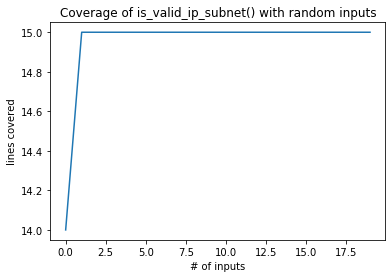

In [92]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [ ]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def random_ip_fuzz(max_length=3, int_start=0, int_range=256):
    octet_length= random.randrange(0, max_length+1)
    ip=""
    for i in range(0,4):
        for j in range (0, max_length):
            ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

## Mutation Fuzzer for Subnet Calculator

In [4]:
import random

# the code mutates the input by randomly deleting a number if the quadratic has more than 1 value
def delete_random_char(s):
    if s == "":
        return s
    pos = random.randint(0, len(s) - 1)
    return s[:pos] + s[pos+1:]

def add_random_char(s):
    pos = random.randint(0, len(s) - 1)
    random_character = str(random.randrange(0, 256)) # changed the char to integer from 0 to 255
    return s[:pos] + random_character + s[pos:]

def flip_random_character(s):
    """Returns s with a random bit flipped in a random position"""
    if s == "":
        return s

    pos = random.randint(0, len(s) - 1)
    c = s[pos]
    bit = 1 << random.randint(0, 6)
    new_c = chr(ord(c) ^ bit)
    # print("Flipping", bit, "in", repr(c) + ", giving", repr(new_c))
    return s[:pos] + new_c + s[pos + 1:]

In [53]:
input_ip_address = "255.255.255.255"
input_subnet= "255.255.255.255"

valid_inputs = set()

mutators = [delete_random_char, add_random_char, flip_random_character]

trials = 1

for i in range(trials):
    for i in range(0, 10):
        mutator = mutators[random.randint(0, 2)]
        mutated_ip_address = mutator(input_ip_address)
        mutated_subnet= mutator(input_subnet)
    print("\nIP Address- "+mutated_ip_address)
    print("\nSubnet- "+mutated_subnet)
    if is_valid_ip_subnet(mutated_ip_address, mutated_subnet):
        valid_inputs.add(mutated_ip_address) 

len(valid_inputs) / trials



IP Address- 255.255.255.28755

Subnet- 251715.255.255.255


0.0

## Coverage Guided Fuzzer for Subnet Calculator

## Smarter Fuzzer for Subnet Calculator


# Credit Card Validator

In [ ]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = None
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'

        return 'Company : ' + comp

    def first_check(self):
        if 13 <= len(self.card_no) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        crd_no = self.card_no[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        return '#CHECKSUM# : ' + self.card_no[-1]

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


card_number = input()
card = CreditCard.set_card(card_number)
print(card.company)
print('Card : ', card.card_no)
print(card.first_check())
print(card.checksum)
print(card.validate())

# 79927398713
# 4388576018402626
# 379354508162306


# RSA algorithm

In [10]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

if __name__ == '__main__':
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt("Heya",public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)

n  72917873361068952384803
phi  72917873360523426507048
e= 67262308119153331459999   phi= 72917873360523426507048
Public:  (67262308119153331459999, 72917873361068952384803)
Private:  (67531184136529517005663, 72917873361068952384803)
encrypted  = [24212264725635597495479, 47638346824408407688492, 48512034843472012381990, 40080404889542166675623]
decrypted = Heya
